**Eliminatorias Sudamericanas 2026**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import itertools
import streamlit as st
from sklearn.model_selection import train_test_split, GridSearchCV
from bs4 import BeautifulSoup
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [26]:
df_el=pd.read_csv("eliminatorias.csv")
df_el

,seleccion,partidos_jugados,partidos_ganados,partidos_empatados,partidos_perdidos,goles_favor,goles_contra,dif_goles,puntos
0,Argentina,10,7,1,2,19,5,14,22
1,Colombia,10,5,4,1,13,6,7,19
2,Uruguay,10,4,4,2,13,6,7,16
3,Brasil,10,5,1,4,15,9,6,16
4,Ecuador,10,4,4,2,6,4,2,13
5,Paraguay,10,3,4,3,4,4,0,13
6,Bolivia,10,4,0,6,11,21,-10,12
7,Venezuela,10,2,5,3,8,10,-2,11
8,Peru,10,1,3,6,3,14,-11,6
9,Chile,10,1,2,7,5,18,-13,5


In [27]:
df_el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   seleccion           10 non-null     object
 1   partidos_jugados    10 non-null     int64 
 2   partidos_ganados    10 non-null     int64 
 3   partidos_empatados  10 non-null     int64 
 4   partidos_perdidos   10 non-null     int64 
 5   goles_favor         10 non-null     int64 
 6   goles_contra        10 non-null     int64 
 7   dif_goles           10 non-null     int64 
 8   puntos              10 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 848.0+ bytes


In [28]:
#Estadisticas de cada columna
df_el.describe()

,partidos_jugados,partidos_ganados,partidos_empatados,partidos_perdidos,goles_favor,goles_contra,dif_goles,puntos
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,10.0,3.600000,2.800000,3.600000,9.700000,9.700000,0.000000,13.300000
std,0.0,1.897367,1.686548,2.065591,5.313505,6.056218,8.993825,5.292552
min,10.0,1.000000,0.000000,1.000000,3.000000,4.000000,-13.000000,5.000000
25%,10.0,2.250000,1.250000,2.000000,5.250000,5.250000,-8.000000,11.250000
50%,10.0,4.000000,3.500000,3.000000,9.500000,7.500000,1.000000,13.000000
75%,10.0,4.750000,4.000000,5.500000,13.000000,13.000000,6.750000,16.000000
max,10.0,7.000000,5.000000,7.000000,19.000000,21.000000,14.000000,22.000000


Text(0.5, 1.0, 'Eliminatorias Sudamericanas')

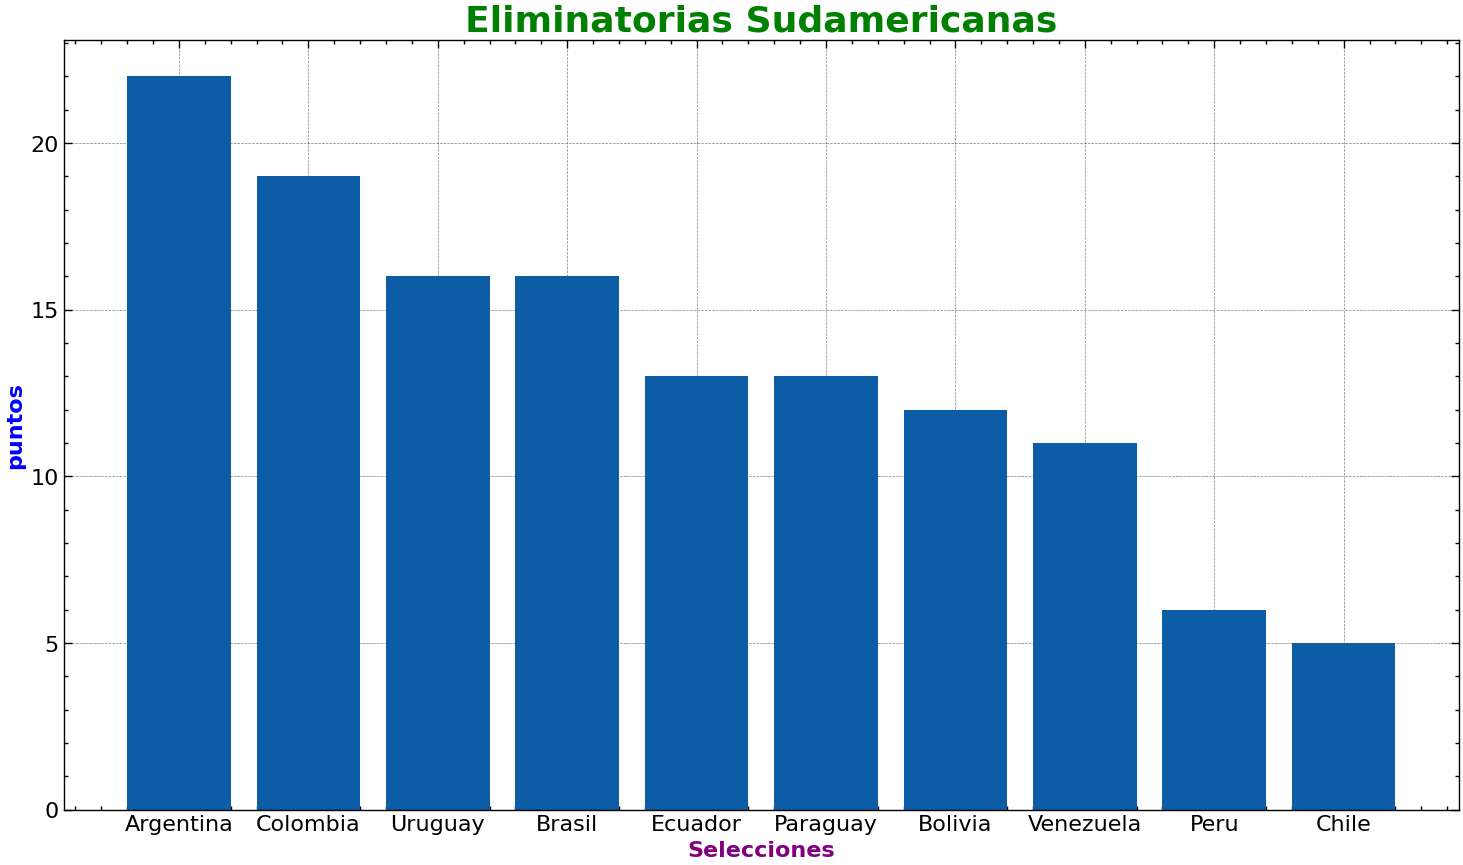

In [29]:
#gráfico de barras de los puntos ganados
plt.figure(figsize=(18, 10))
plt.bar(df_el["seleccion"], df_el["puntos"])
plt.xlabel('Selecciones', color='purple', fontsize=16, fontweight='bold')
plt.ylabel('puntos', color='b', fontsize=16, fontweight='bold')
plt.title('Eliminatorias Sudamericanas', color='g', fontsize=26, fontweight='bold')

Text(0.5, 1.0, 'Proporción de Puntos')

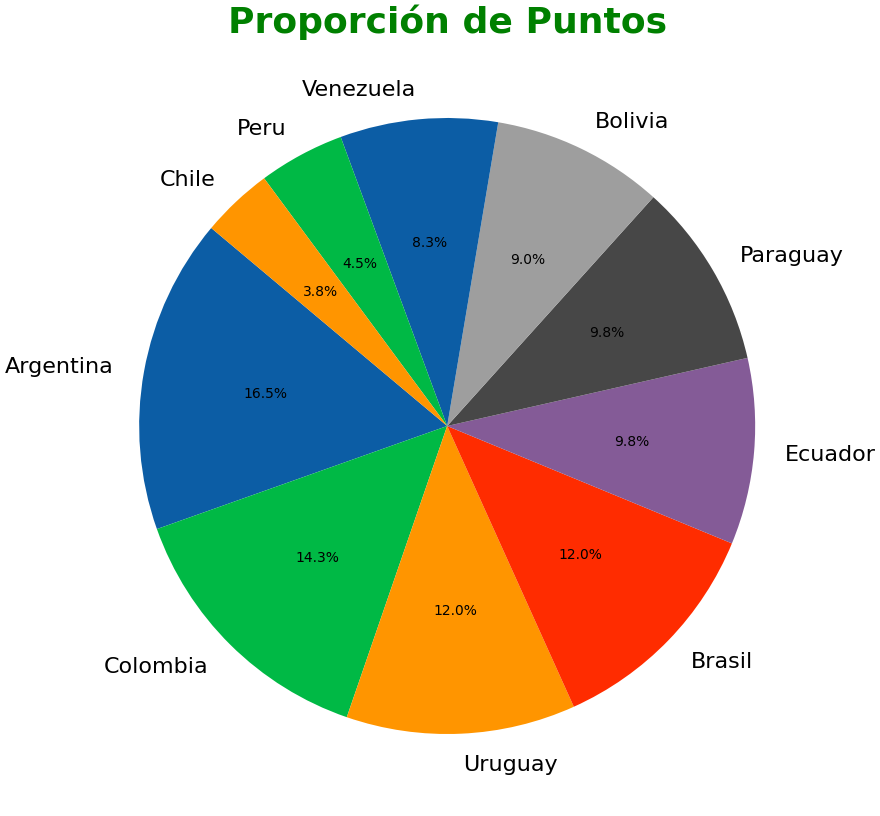

In [30]:
#gráfico de pastel del porcentaje de los puntos ganados
plt.figure(figsize=(10,10))
plt.pie(df_el["puntos"], labels=df_el["seleccion"], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Puntos', color='g', fontsize=26, fontweight='bold')

Árbol de Decisión:
RMSE: 4.74
MAE: 4.50
R^2: 0.47

Regresión Lineal:
RMSE: 1.97
MAE: 1.95
R^2: 0.91


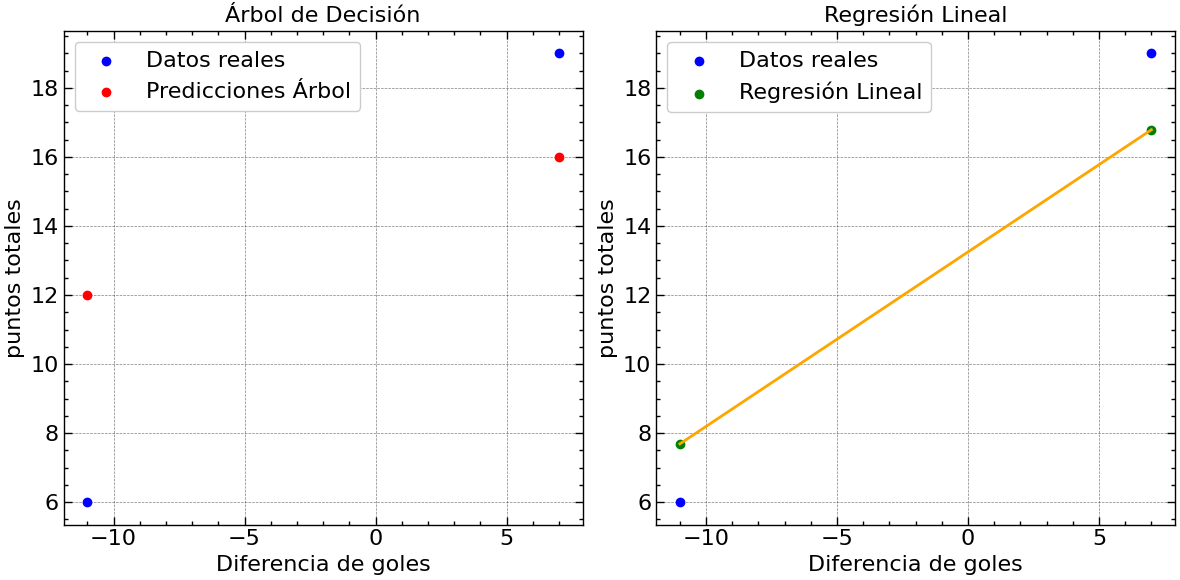

In [38]:
#modelos de desición de árbol y regresión lineal

# Dividir los datos en conjuntos de puntos y diferencia de goles
X_train, X_test, y_train, y_test = train_test_split(df_el[['dif_goles']], df_el['puntos'], test_size=0.2, random_state=42)

# 1. Entrenar el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 2. Hacer predicciones con el árbol de decisión
y_pred_tree = tree_model.predict(X_test)

# 3. Evaluar el árbol de decisión
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

# 4. Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 5. Hacer predicciones con la regresión lineal
y_pred_linear = linear_model.predict(X_test)

# 6. Evaluar la regresión lineal
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# 7. Resultados de la evaluación
print("Árbol de Decisión:")
print(f"RMSE: {tree_rmse:.2f}")
print(f"MAE: {tree_mae:.2f}")
print(f"R^2: {tree_r2:.2f}")

print("\nRegresión Lineal:")
print(f"RMSE: {linear_rmse:.2f}")
print(f"MAE: {linear_mae:.2f}")
print(f"R^2: {linear_r2:.2f}")

# 8. Visualización de los resultados
plt.figure(figsize=(12, 6))

# Graficar el árbol de decisión
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_tree, color='red', label='Predicciones Árbol')
plt.title('Árbol de Decisión')
plt.xlabel('Diferencia de goles')
plt.ylabel('puntos totales')
plt.legend()

# Graficar la regresión lineal
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_linear, color='green', label='Regresión Lineal')
plt.plot(X_test, linear_model.predict(X_test), color='orange')  # Línea de la regresión
plt.title('Regresión Lineal')
plt.xlabel('Diferencia de goles')
plt.ylabel('puntos totales')
plt.legend()

plt.tight_layout()
plt.show()

<Axes: xlabel='dif_goles', ylabel='puntos'>

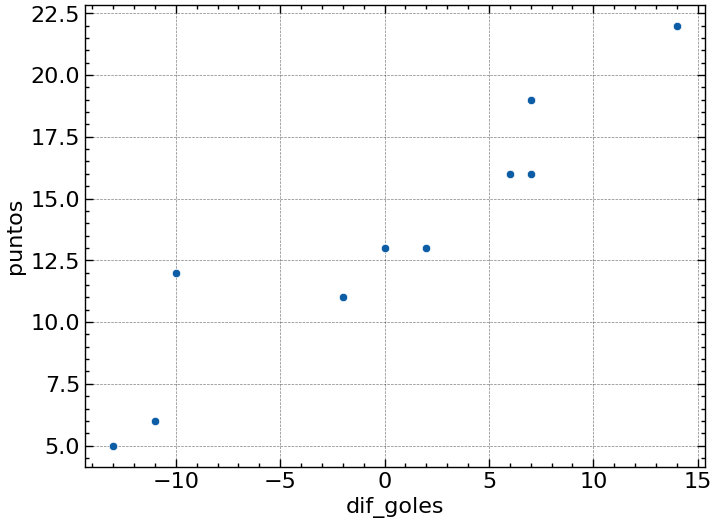

In [34]:
#gráfico de dispersión entre la diferencia de goles y puntos ganados
sns.scatterplot(x=df_el["dif_goles"], y=df_el["puntos"])

**Probabilidades de Clasificación**

_Acá generamos una simulación de Monte Carlo, para determinar las probabilidades_

In [32]:


# Parámetros de la simulación
n_simulaciones = 10000
n_partidos_restantes = 6  # Número total de puntos que se pueden ganar
n_clasifican = 7           # Número de selecciones que clasifican

# Simulación de Monte Carlo
clasificaciones = []

for _ in range(n_simulaciones):
    # Copiar el DataFrame original para simular
    df_sim = df_el.copy()
    
    # Asignar resultados aleatorios en los partidos restantes
    for i in range(len(df_sim)):
        # Ganar, empatar o perder en los partidos restantes
        resultado = np.random.choice(['ganar', 'empatar', 'perder'], p=[0.3, 0.4, 0.3])
        if resultado == 'ganar':
            df_sim.at[i, 'puntos'] += 3
            df_sim.at[i, 'dif_goles'] += np.random.randint(1, 4)  # Gana entre 1 y 3 goles
        elif resultado == 'empatar':
            df_sim.at[i, 'puntos'] += 1

    # Clasificación final basada en puntos y diferencia de goles
    df_sim_sorted = df_sim.sort_values(by=['puntos', 'dif_goles'], ascending=[False, False])
    
    # Seleccionar las 7 selecciones que clasifican
    clasificadas = df_sim_sorted.head(n_clasifican)['seleccion'].tolist()
    
    # Almacenar las selecciones clasificadas
    clasificaciones.append(clasificadas)

# Calcular la probabilidad de clasificación para cada selección
probabilidades = {seleccion: 0 for seleccion in df_el['seleccion']}

for clasificados in clasificaciones:
    for seleccion in clasificados:
        probabilidades[seleccion] += 1

# Convertir a probabilidades
for seleccion in probabilidades:
    probabilidades[seleccion] /= n_simulaciones

# Mostrar las probabilidades
for seleccion, probabilidad in probabilidades.items():
    print(f"Probabilidad de clasificación de {seleccion}: {probabilidad:.2%}")


Probabilidad de clasificación de Argentina: 100.00%
Probabilidad de clasificación de Colombia: 100.00%
Probabilidad de clasificación de Uruguay: 100.00%
Probabilidad de clasificación de Brasil: 100.00%
Probabilidad de clasificación de Ecuador: 98.09%
Probabilidad de clasificación de Paraguay: 96.51%
Probabilidad de clasificación de Bolivia: 66.58%
Probabilidad de clasificación de Venezuela: 38.82%
Probabilidad de clasificación de Peru: 0.00%
Probabilidad de clasificación de Chile: 0.00%
